## 1.3 EDA

### 1.3.1 승하차인구 EDA

**다양한 EDA 시각화를 위해 메타데이터를 생성했습니다.**
* 1. 연도별 유동인구 승차합
* 2. 전체년도 시간대별 유동인구 (역 sum)
* 3. 코로나 전후 유동인구 비교
* 4. 전체년도 일평균 유동인구 top10

In [61]:
# 승하차 컬럼분리
on_cols = [col for col in subway_onoff.columns if '승차' in col]
off_cols = [col for col in subway_onoff.columns if '하차' in col]

# 시간대 list형태로 저장 (time_list)
time_list = list(subway_onoff[on_cols].columns)
for i in range(len(time_list)):
    start = time_list[i].index("승")
    time_list[i] = time_list[i][:start-1]

In [62]:
# 시각화를 위한 서브데이터 생성 
# 1. 연도별 유동인구 승하차합
count_18 = pd.DataFrame()
count_19 = pd.DataFrame()
count_20 = pd.DataFrame()
count_21 = pd.DataFrame()

# 승하차 인구 역별 시간대별로 합치기
for i in range(0,24):
    for j in range(18,22):
        exec(f"b = subway_{j}[on_cols].iloc[:,i] + subway_{j}[off_cols].iloc[:,i]")
        exec(f"count_{j}[time_list[i]]=b")

for k in range(18,22):
    exec(f"count_{k}.insert(0,'역사명',subway_{k}.iloc[:,0])")

역별 시간대별 평균 유동인구 데이터 count_{연도}를 생성했습니다

In [65]:
count_18.head()

,역사명,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,4.19민주묘지역,18.0,1860.0,4354.0,9511.0,16652.0,11639.0,11200.0,10455.0,11070.0,...,13757.0,11169.0,7842.0,6403.0,5476.0,3551.0,926.0,7.0,1.0,0.0
1,가락시장역,35.0,8414.0,24758.0,58727.0,113722.0,67910.0,51829.0,52484.0,52829.0,...,114887.0,73058.0,51420.0,48100.0,42536.0,23324.0,6609.0,611.0,16.0,0.0
2,가산디지털단지역,2026.0,23512.0,49624.0,177259.0,597107.0,306610.0,111458.0,96974.0,101226.0,...,506217.0,259587.0,147550.0,134050.0,82898.0,42848.0,6647.0,30.0,3.0,0.0
3,가양역,93.0,16303.0,37856.0,104870.0,118116.0,70108.0,54292.0,50425.0,53846.0,...,105624.0,90860.0,59313.0,51902.0,48953.0,31972.0,9681.0,726.0,1.0,0.0
4,가오리역,11.0,2849.0,7157.0,19401.0,22183.0,15205.0,12598.0,11405.0,12314.0,...,18094.0,17472.0,11373.0,9070.0,7815.0,4811.0,1373.0,10.0,3.0,0.0


In [66]:
# 2. 시간대별 유동인구 메타데이터
time_df = pd.DataFrame()
time_df['시간대'] = list(subway_18.iloc[:,1:].columns)
avg_pop = list(round((subway_18.iloc[:,1:].sum() + subway_19.iloc[:,1:].sum() + subway_20.iloc[:,1:].sum() + subway_21.iloc[:,1:].sum())/4))

time_df.insert(1,'평균유동인구',avg_pop)

time_top10 = time_df.sort_values('평균유동인구',ascending=False).head(10)
time_top10

,시간대,평균유동인구
9,08시-09시 하차인원,17409007.0
28,18시-19시 승차인원,16876420.0
29,18시-19시 하차인원,13933669.0
8,08시-09시 승차인원,12752644.0
26,17시-18시 승차인원,12051382.0
11,09시-10시 하차인원,11488498.0
31,19시-20시 하차인원,11365857.0
6,07시-08시 승차인원,10200630.0
27,17시-18시 하차인원,9848519.0
30,19시-20시 승차인원,9321070.0


In [67]:
# 3. 코로나 전후 시간대 막대그래프
# (전) 18/19년도 시간대별 평균
before_covid = np.mean(count_18.iloc[:,1:] + count_19.iloc[:,1:])
# (후) 20/21년도 시간대별 평균
after_covid = np.mean(count_21.iloc[:,1:] + count_20.iloc[:,1:])

In [68]:
# 4. 전체연도 역별 일평균유동인구 - 히스토그램
sub_df = pd.DataFrame()
sub_df['전체평균'] = list((count_18.sum(axis=1) + count_19.sum(axis=1) + count_20.sum(axis=1) + count_21.sum(axis=1))/4)
sub_df.insert(0,'역명',subway_18['역사명'])
sub_df.sort_values('전체평균', ascending=False).head(10)

,역명,전체평균
247,잠실역,5203584.75
7,강남역,5169537.00
22,고속터미널역,4821449.25
286,홍대입구역,4663775.00
150,서울역,4590708.25
128,사당역,3764346.25
181,신림역,3705438.00
155,선릉역,3573112.50
31,구로디지털단지역,3386019.00
180,신도림역,3268429.25


In [699]:
page=Page()

bar = Bar("연도별 시간대별 평균 유동인구 (승하차합)",width=1000,height=400)
attr = time_list

v1= list(round(count_18.mean()))
v2= list(round(count_19.mean()))
v3= list(round(count_20.mean()))
v4= list(round(count_21.mean()))

bar.add("2018", attr, v1, mark_point=["max"])
bar.add("2019", attr, v2, mark_point=["max"])
bar.add("2020", attr, v3, mark_point=["max"])
bar.add("2021", attr, v4, mark_point=["max"])

page.add(bar)

attr = list(time_top10['시간대'])
v1 = time_top10['평균유동인구']

pie = Pie("유동인구 시간대 Top 10",width=1000)
pie.add("A", attr, v1, is_random=True, radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)
pie

page.add(pie)

line = Line("코로나 전후 시간대별 유동인구 비교",width=1000)
attr = time_list
line.add("before", attr, list(before_covid), mark_point=["average"])
line.add("after", attr, list(after_covid), mark_point=["average"])
page.add(line)

attr = list(sub_df.sort_values('전체평균', ascending=False).head(10).iloc[:,0])
v1 = list(sub_df.sort_values('전체평균', ascending=False).head(10).iloc[:,1])
bar1 = Bar("일평균 유동인구 top10",width=1000)
bar1.add("",
    attr,v1,
    is_datazoom_show=True,
    xaxis_rotate=30,
    datazoom_type="both",
    datazoom_range=[0, 50]
)
page.add(bar1)

**연도별 시간대별 평균 유동인구 (승하차합)**

- 2018년, 2019년, 2020년, 2021년 초까지 각 시간대별 평균 유동인구를 시각화하여 어느 시간대에 평균 유동인구가 많은지 확인하였습니다.
    - 출퇴근 시간대인 오전 7시 ~ 8시, 오후 6시 ~ 7시 사이가 평균 유동인구가 가장 많았습니다.
    - 2020년은 2018년, 2019년에 비해 대부분의 시간대에서 평균 유동인구가 줄었음을 확인할 수 있었습니다.

**유동인구 시간대 Top 10**

- 08시 ~ 09시 하차인원, 18시 ~ 19시 승차인원, 18시 ~ 19시 하차인원이 각각 13.9%, 13.48%, 11.13% 순으로 가장 높았습니다.

**코로나 전후 시간대별 유동인구 비교**

- 코로나 전후 시간대별 유동인구 비교 결과 모든 시간대에서 코로나 이후에 유동인구가 감소했음을 알 수 있었습니다.
    - 코로나 이전 평균 유동인구 수는 약 90,000명, 코로나 이후 평균 유동인구 수는 약 70,000명으로 평균적으로 대략 20,000명 정도가 감소하였습니다.

**일평균 유동인구 Top 10**

- 일평균 유동인구가 가장 많은 역은 잠실역, 강남역, 고속터미널 역 순으로 대략 5,000,000명이 이용함을 알 수 있습니다.


In [70]:
# (4개년도 평균) 시간대 top 10에 유동인구가 많은 역들
count_top5 = subway_group.groupby(['역사명']).mean()[list(time_top10.시간대)]
count_top5.sort_values([count_top5.columns[0]],ascending=False).head(15)

,08시-09시 하차인원,18시-19시 승차인원,18시-19시 하차인원,08시-09시 승차인원,17시-18시 승차인원,09시-10시 하차인원,19시-20시 하차인원,07시-08시 승차인원,17시-18시 하차인원,19시-20시 승차인원
역사명,,,,,,,,,,
가산디지털단지역,538071.75,424813.50,62722.75,36922.25,207241.50,279535.75,48094.00,34249.50,53901.75,189378.25
선릉역,412361.00,353191.50,83392.75,39160.00,199763.75,295765.00,56059.25,25450.00,72707.50,176449.50
시청역,381096.00,311227.00,44474.25,16760.50,148267.00,162922.00,24366.50,12017.00,43097.50,122535.50
서울역,352468.50,342904.25,152209.00,117321.50,225875.00,219062.25,114054.25,68376.00,141390.50,181654.00
여의도역,349234.50,301985.25,60865.50,24446.50,197911.75,124007.00,36964.50,17734.75,46544.25,121999.25
역삼역,330852.25,275723.00,59120.75,25605.75,165494.50,260735.00,41560.50,14979.50,50068.75,139270.50
강남역,326491.75,358026.75,220429.25,65984.50,241433.75,335853.25,155413.00,41068.00,159474.25,232929.00
삼성역,321926.75,298172.00,71594.00,22888.75,182693.75,240832.75,44349.25,16820.25,64299.25,177326.50
을지로입구역,301007.75,261982.25,58729.00,14104.25,137465.25,148593.25,35370.25,7928.75,53347.75,126717.25


### 1.3.2 지하상가 임대정보 EDA 

**다양한 EDA 시각화를 위해 메타데이터를 생성했습니다.**
* 1. 역별 공실 면적의 평균
* 2. 호선별 공실/비공실 개수
* 3. 호선별 공실률

In [72]:
# 1. 역별 공실 면적의 평균
subway_rent[subway_rent['상가유형']==1].groupby(['역사명']).median().sort_values('면적',ascending=False)

,상가유형,면적
역사명,,
신대방역,1,240.30
수락산역,1,100.00
독바위역,1,85.00
강남구청역,1,73.30
남구로역,1,69.14
...,...,...
충무로역,1,18.86
미아사거리역,1,18.66
마포역,1,17.43


In [71]:
# median
area_med = round(subway_rent[subway_rent["상가유형"]==1].groupby('역사명').median())
# 면적sum
area_sum = round(subway_rent[subway_rent["상가유형"]==1].groupby('역사명').sum())

In [700]:
import random
page1 = Page()

# 1. 역별 공실 면적의 평균
attr = list(area_sum.index)
v1 = list(area_med['면적'])
v2 = list(area_sum['면적'])
bar = Bar("역별 공실 면적(m2)",width=1000)
bar.add("median", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("sum", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
page1.add(bar)

# 2. 호선별 공실/비공실 개수
subway_rent1 = pd.read_csv(file_subway_rent,encoding='euc-kr')
attr = subway_rent1.loc[subway_rent1['상가유형'] == '공실'].groupby("호선").count()["상가유형"].index
v1 = list(subway_rent1.loc[subway_rent1['상가유형'] == '공실'].groupby("호선").count()["상가유형"])
v2 = list(subway_rent1.loc[subway_rent1['상가유형'] != '공실'].groupby("호선").count()["상가유형"])
bar2 = Bar("공실 및 비공실 개수",width=1000)#background_color = "#b8c4c2"
bar2.add("비공실",attr, v2, is_stack=True, label_color=['rgba(255, 234, 41, 0.92)'])
bar2.add("공실", attr, v1, is_stack=True, label_color=['rgba(176, 196, 49, 0.92)'])
page1.add(bar2)


# 3. 호선별 공실률
from pyecharts import Bar

total_store =  subway_rent1.groupby("호선").count()["상가유형"]
empty_store = subway_rent1.loc[subway_rent1['상가유형'] == '공실'].groupby("호선").count()["상가유형"]
empty_per = empty_store*100 / total_store

attr = subway_rent1.loc[subway_rent1['상가유형'] == '공실'].groupby("호선").count()["상가유형"].index
v1 = empty_per
pie = Pie("호선별 상가 수 대비 공실율",width=1000)#background_color = "#b8c4c2"
pie.add("공실율",attr, v1, radius=[30, 75],is_stack=False,is_label_show=True,
        is_random=True, rosetype='area',
       legend_orient='vertical', legend_pos='right')

page1.add(pie)

**역별 공실 면적(m2)**

- 지하상가 임대정보 데이터에서 각 역사별 공실 면적을 시각화 하였습니다.
    - 합계 공실 면적이 가장 큰 역은 석계역으로 총 523m2, 가장 작은 역은 을지로4가역으로 총 15m2로 나타났습니다.
    - 공실 중앙값이 가장 큰 역은 신대방역으로 240m2, 가장 작은 역은 을지로4가역으로 15m2로 나타났습니다.

**공실 및 비공실 개수**

- 각 호선별로 공실 수와 공실이 아닌 곳(비공실)의 수를 시각화한 결과 공실이 가장 많은 곳은 6호선, 비공실이 가장 많은 곳은 7호선임을 확인할 수 있었습니다.

**호선별 상가 수 대비 공실율**

- 각 호선별 상가수 대비 공실 비율을 시각화한 결과 그 비율이 가장 큰 곳은 1호선으로 32.18%이고, 가장 작은 곳은 5호선으로 3.84%로 나타났습니다.


### 1.3.3 소상공인 상가정보 EDA

**소상공인 상가정보에 대한 히트맵을 생성했습니다**


In [73]:
# 서울시 구별 레이어 파일 불러오기
gdf_admin_gu_pg = gpd.read_file('seoul_gu_2010.shp', encoding='euc-kr')  
gdf_admin_gu_pg = gdf_admin_gu_pg[['code','name','area','geometry']]
gdf_admin_gu_pg.head()

,code,name,area,geometry
0,11250,강동구,25486285.1,"POLYGON ((215562.867 453031.909, 215532.354 45..."
1,11240,송파구,33672460.8,"POLYGON ((211310.865 446846.969, 211373.028 44..."
2,11230,강남구,38436479.0,"POLYGON ((203857.752 447875.271, 203992.789 44..."
3,11220,서초구,47891775.5,"POLYGON ((201747.392 445616.761, 201750.611 44..."
4,11210,관악구,29854871.0,"POLYGON ((193667.544 443578.695, 193696.357 44..."


In [74]:
# 좌표계 4326로 변환하고 파일로 저장
gdf_admin_gu_pg3 = gdf_admin_gu_pg.to_crs(epsg=4326)
gdf_admin_gu_pg3['code'] = gdf_admin_gu_pg3['code'].astype(str)
gdf_admin_gu_pg3.to_file('seoul_gu4326.geojson', driver='GeoJSON')


# 서울시 소상공인 가게들 공간데이터화
geom_store = gpd.points_from_xy(store.경도, store.위도)
columns = ['상권업종대분류명','상권업종중분류명','시군구명','행정동명']

gdf_store = gpd.GeoDataFrame(store[columns], geometry=geom_store, crs=from_epsg(4326))


# 소상공인 점포들 epsg:4326로 좌표계 변환
gdf_store = gdf_store.to_crs(epsg=4326)

In [75]:
# store 공간데이터를 geojson으로 저장
gdf_store.to_file('store_geojson', driver='GeoJSON')

# 서울시 시군구 데이터와 소상공인 데이터 합치기
gdf_store_gu = pd.merge(gdf_admin_gu_pg3, gdf_store, how='left', left_on='name', right_on='시군구명')

columns2=['code', 'name',  '상권업종대분류명', '상권업종중분류명','행정동명' ]
gdf_store_gu2 = gpd.GeoDataFrame(gdf_store_gu[columns2], geometry=gdf_store_gu.geometry_y, crs=from_epsg(4326))
# gdf_store_gu2.head()

In [76]:
gdf_store_gu_num = gdf_store_gu2.groupby('name',as_index=False).count()

# 구별 소상공인 점포수
df1 =  gdf_store_gu_num[["name","code"]]
df1.rename(columns= {"code" : "count"}, inplace = True)
df1.head()

,name,count
0,강남구,30114
1,강동구,13199
2,강북구,7862
3,강서구,14837
4,관악구,13373


In [77]:
# 인근 수급처 수 통합
gdf_admin_gu_pg3 = pd.merge(gdf_admin_gu_pg3 , df1, on = "name")
gdf_admin_gu_pg3.head()

,code,name,area,geometry,count
0,11250,강동구,25486285.1,"POLYGON ((127.17697 37.57945, 127.17663 37.578...",13199
1,11240,송파구,33672460.8,"POLYGON ((127.12874 37.52379, 127.12944 37.523...",17920
2,11230,강남구,38436479.0,"POLYGON ((127.04443 37.53312, 127.04596 37.532...",30114
3,11220,서초구,47891775.5,"POLYGON ((127.02055 37.51277, 127.02059 37.512...",17870
4,11210,관악구,29854871.0,"POLYGON ((126.92918 37.49439, 126.92951 37.494...",13373


In [628]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (10,10) #차트 사이즈

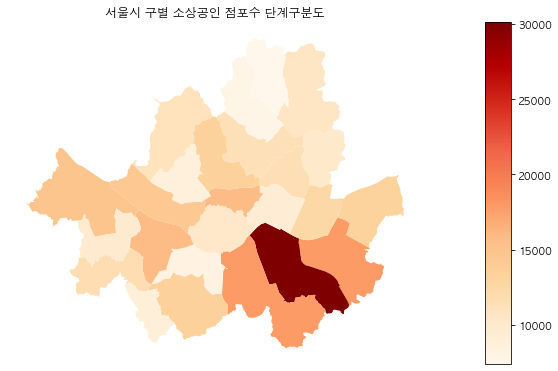

In [629]:
# 서울시 시군구 소상공인 단계구분도(Chropleth Map) 시각화
fig, ax = plt.subplots(1, 1)

# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# 시각화
column = 'count'
gdf_admin_gu_pg3.plot(column, ax=ax, legend=True, cax=cax, cmap='OrRd')
ax.set_title("서울시 구별 소상공인 점포수 단계구분도")
ax.set_axis_off()
plt.show()

**서울시 구별 소상공인 점포수 단계구분도**

- 서울시 구별 소상공인 점포수가 가장 많은 구는 강남구로 나타났습니다.


본 저장물의 저작권은 Apache License v2.0을 따릅니다